In [1]:
#In this file Big Query zipcode tables data is cleaned and imputed appropriately
#A big task performed here is the build the acs features in line with the ZRI data
#which is provided monthly.  The ACS features are duplicated for the months and the data
#is pushed back by time t in years i.e. 3 would mean that ACS features from 3 years ago
#would be used (this code needs some more refactoring)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
%matplotlib inline
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="./utility-vista-307720-6cec755818c9.json"
client = bigquery.Client()
%load_ext google.cloud.bigquery

In [2]:
zri_all_clean=pd.read_csv("Phoenix_All_ZRI.csv")

In [3]:
zri_all_clean.isnull().any()

Unnamed: 0    False
RegionID      False
zipcode       False
City          False
State         False
Metro         False
CountyName    False
SizeRank      False
Period        False
ZRI           False
ZRI_norm      False
Year          False
Month         False
dtype: bool

In [4]:
zri_all_clean_2014_2020=zri_all_clean[(zri_all_clean["Year"]>=2014) & (zri_all_clean["Year"]<=2020)]

In [5]:
#features should go back 3 years
t=3

In [6]:
%%bigquery acs_zip_codes_2011_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2011_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 78.44rows/s]


In [7]:
%%bigquery acs_zip_codes_2012_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2012_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 82.95rows/s]


In [8]:
%%bigquery acs_zip_codes_2013_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2013_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 82.99rows/s]


In [9]:
%%bigquery acs_zip_codes_2014_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2014_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 82.45rows/s]


In [10]:
%%bigquery acs_zip_codes_2015_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 80.78rows/s]


In [11]:
%%bigquery acs_zip_codes_2016_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 81.76rows/s]


In [12]:
%%bigquery acs_zip_codes_2017_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 75.98rows/s]


In [13]:
%%bigquery acs_zip_codes_2018_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2018_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:01<00:00, 79.50rows/s]


In [14]:
acs_zip_codes_2011_5yr["Year"]=2011
acs_zip_codes_2012_5yr["Year"]=2012
acs_zip_codes_2013_5yr["Year"]=2013
acs_zip_codes_2014_5yr["Year"]=2014
acs_zip_codes_2015_5yr["Year"]=2015
acs_zip_codes_2016_5yr["Year"]=2016
acs_zip_codes_2017_5yr["Year"]=2017
acs_zip_codes_2018_5yr["Year"]=2018

In [15]:
acs_cols_2011=acs_zip_codes_2011_5yr.columns
acs_cols_2012=acs_zip_codes_2012_5yr.columns
acs_cols_2013=acs_zip_codes_2013_5yr.columns
acs_cols_2014=acs_zip_codes_2014_5yr.columns
acs_cols_2015=acs_zip_codes_2015_5yr.columns
acs_cols_2016=acs_zip_codes_2016_5yr.columns
acs_cols_2017=acs_zip_codes_2017_5yr.columns
acs_cols_2018=acs_zip_codes_2018_5yr.columns

In [16]:
common_columns=list(((((((set(acs_cols_2011).intersection
   (set(acs_cols_2012))).intersection
  (set(acs_cols_2013))).intersection
 (set(acs_cols_2014))).intersection
(set(acs_cols_2015))).intersection(set(acs_cols_2016)))
                    .intersection(set(acs_cols_2017))).intersection(set(acs_cols_2018)))

In [17]:
len(common_columns)

235

In [18]:
frames=[acs_zip_codes_2011_5yr[common_columns],
        acs_zip_codes_2012_5yr[common_columns],
        acs_zip_codes_2013_5yr[common_columns],
        acs_zip_codes_2014_5yr[common_columns],
        acs_zip_codes_2015_5yr[common_columns],
        acs_zip_codes_2016_5yr[common_columns],
        acs_zip_codes_2017_5yr[common_columns],
        acs_zip_codes_2018_5yr[common_columns]]
acs_all_phoenix=pd.concat(frames)

In [19]:
acs_all_phoenix.head()
acs_all_phoenix.shape

(1040, 235)

In [20]:
missingRowsACS = pd.isnull(acs_all_phoenix).sum(axis=1) > 0
missingColsACS = pd.isnull(acs_all_phoenix).sum(axis=0) > 0
missingColsACS.sum()

16

In [21]:
#Drop columns that have missing data for 2 or more zipcodes
for col in acs_all_phoenix.columns[missingColsACS]:
    if pd.isnull(acs_all_phoenix[col]).sum()>=0: 
        print(f"Dropping {col} from ACS")
        acs_all_phoenix.drop(col,axis=1,inplace=True)

Dropping bachelors_degree from ACS
Dropping renter_occupied_housing_units_paying_cash_median_gross_rent from ACS
Dropping median_rent from ACS
Dropping less_one_year_college from ACS
Dropping high_school_diploma from ACS
Dropping speak_spanish_at_home_low_english from ACS
Dropping pop_25_years_over from ACS
Dropping aggregate_travel_time_to_work from ACS
Dropping median_year_structure_built from ACS
Dropping percent_income_spent_on_rent from ACS
Dropping speak_spanish_at_home from ACS
Dropping one_year_more_college from ACS
Dropping associates_degree from ACS
Dropping speak_only_english_at_home from ACS
Dropping masters_degree from ACS
Dropping pop_5_years_over from ACS


In [22]:
acs_all_phoenix.shape

(1040, 219)

In [23]:
#use this data to replace values missing in 2011
replacement_rows = acs_all_phoenix[acs_all_phoenix["Year"]==2012]

In [24]:
def impute_masters_degree(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["masters_degree"].values[0]
def impute_pop_25_years_over(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["pop_25_years_over"].values[0]
def impute_associates_degree(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["associates_degree"].values[0]
def impute_less_one_year_college(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["less_one_year_college"].values[0]
def impute_high_school_diploma(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["high_school_diploma"].values[0]
def impute_one_year_more_college(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["one_year_more_college"].values[0]
def impute_bachelors_degree(row):
    return replacement_rows[replacement_rows["geo_id"]==row["geo_id"]]["bachelors_degree"].values[0]

In [25]:
missingrows = acs_all_phoenix['masters_degree'].isnull()
acs_all_phoenix.loc[missingrows,'masters_degree']=acs_all_phoenix[missingrows].apply(impute_masters_degree, axis=1)
acs_all_phoenix.loc[missingrows,'pop_25_years_over']=acs_all_phoenix[missingrows].apply(impute_pop_25_years_over, axis=1)
acs_all_phoenix.loc[missingrows,'associates_degree']=acs_all_phoenix[missingrows].apply(impute_associates_degree, axis=1)
acs_all_phoenix.loc[missingrows,'less_one_year_college']=acs_all_phoenix[missingrows].apply(impute_less_one_year_college, axis=1)
acs_all_phoenix.loc[missingrows,'high_school_diploma']=acs_all_phoenix[missingrows].apply(impute_high_school_diploma, axis=1)
acs_all_phoenix.loc[missingrows,'one_year_more_college']=acs_all_phoenix[missingrows].apply(impute_one_year_more_college, axis=1)
acs_all_phoenix.loc[missingrows,'bachelors_degree']=acs_all_phoenix[missingrows].apply(impute_bachelors_degree, axis=1)

KeyError: 'masters_degree'

In [27]:
#acs_all_phoenix.to_csv("ACS_Phoenix_All_Imputed.csv")

In [28]:
zri_all_clean_2014_2020.shape

(9563, 13)

In [29]:
zri_all_clean_2014_2020=zri_all_clean_2014_2020.sort_values(["zipcode","Year","Month"])

In [30]:
zri_all_clean_2014_2020_count=zri_all_clean_2014_2020.groupby(["Year","zipcode","Month"])["Year"].agg('count')

In [31]:
zri_all_clean_2014_2020.shape

(9563, 13)

In [32]:
zri_all_clean_2014_2020.dtypes

Unnamed: 0      int64
RegionID        int64
zipcode         int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
Period         object
ZRI           float64
ZRI_norm      float64
Year            int64
Month           int64
dtype: object

In [33]:
zri_all_clean_2014_2020=zri_all_clean_2014_2020[zri_all_clean_2014_2020["zipcode"]!=85378]

In [34]:
zri_all_clean_2014_2020.head()

,Unnamed: 0,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,Period,ZRI,ZRI_norm,Year,Month
5221,5221,94719,85003,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,8223,2014-01,1091.0,-0.461999,2014,1
5352,5352,94719,85003,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,8223,2014-02,1096.0,-0.445885,2014,2
5483,5483,94719,85003,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,8223,2014-03,1093.0,-0.455553,2014,3
5614,5614,94719,85003,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,8223,2014-04,1102.0,-0.426548,2014,4
5745,5745,94719,85003,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,8223,2014-05,1110.0,-0.400766,2014,5


In [35]:
acs_all_phoenix[acs_all_phoenix["geo_id"]=="85383"]

,management_business_sci_arts_employed,pop_16_over,income_45000_49999,three_cars,dwellings_1_units_detached,do_date,rent_40_to_50_percent,two_parent_families_with_young_children,income_75000_99999,worked_at_home,pop_25_64,male_45_64_bachelors_degree,employed_manufacturing,male_35_to_39,sales_office_employed,commute_35_44_mins,two_or_more_races_pop,female_65_to_66,dwellings_10_to_19_units,male_under_5,income_100000_124999,married_households,income_150000_199999,high_school_including_ged,employed_public_administration,female_5_to_9,commute_30_34_mins,owner_occupied_housing_units,income_less_10000,occupation_management_arts,asian_male_45_54,occupied_housing_units,male_67_to_69,asian_male_55_64,housing_built_1939_or_earlier,black_male_45_54,commute_less_10_mins,female_10_to_14,white_male_45_54,income_30000_34999,dwellings_1_units_attached,armed_forces,not_in_labor_force,male_21,two_parents_not_in_labor_force_families_with_young_children,female_20,income_10000_14999,in_school,commute_10_14_mins,mobile_homes,employed_arts_entertainment_recreation_accommodation_food,Year,mortgaged_housing_units,female_25_to_29,rent_15_to_20_percent,white_male_55_64,hispanic_male_55_64,geo_id,pop_determined_poverty_status,commuters_16_over,households,female_22_to_24,total_pop,employed_information,children,female_45_to_49,male_50_to_54,dwellings_5_to_9_units,commuters_by_car_truck_van,bachelors_degree_2,vacant_housing_units,male_18_to_19,income_25000_29999,housing_built_2000_to_2004,family_households,commute_15_19_mins,less_than_high_school_graduate,male_45_64_high_school,male_45_64_less_than_9_grade,nonfamily_households,male_45_to_64,one_car,some_college_and_associates_degree,female_pop,female_67_to_69,female_18_to_19,owner_occupied_housing_units_upper_value_quartile,hispanic_male_45_54,commuters_by_bus,commute_45_59_mins,male_55_to_59,income_40000_44999,population_3_years_over,male_10_to_14,male_80_to_84,income_20000_24999,different_house_year_ago_same_city,amerindian_pop,population_1_year_and_over,other_race_pop,rent_30_to_35_percent,two_parents_mother_in_labor_force_families_with_young_children,in_grades_1_to_4,housing_built_2005_or_later,male_30_to_34,female_50_to_54,female_80_to_84,occupation_sales_office,male_20,male_male_households,female_40_to_44,no_cars,commuters_drove_alone,female_30_to_34,employed_agriculture_forestry_fishing_hunting_mining,black_male_55_64,no_car,two_parents_father_in_labor_force_families_with_young_children,employed_pop,female_62_to_64,male_45_64_some_college,poverty,employed_finance_insurance_real_estate,male_15_to_17,income_125000_149999,rent_under_10_percent,walked_to_work,male_85_and_over,male_75_to_79,male_40_to_44,median_income,children_in_single_female_hh,asian_pop,commuters_by_public_transportation,two_cars,workers_16_and_over,employed_education_health_social,dwellings_2_units,not_hispanic_pop,four_more_cars,male_45_64_grade_9_12,male_22_to_24,black_pop,million_dollar_housing_units,employed_transportation_warehousing_utilities,vacant_housing_units_for_rent,female_21,group_quarters,in_undergrad_college,female_female_households,households_public_asst_or_food_stamps,father_in_labor_force_one_parent_families_with_young_children,male_45_to_49,commuters_by_subway_or_elevated,rent_burden_not_computed,income_200000_or_more,male_pop,civilian_labor_force,graduate_professional_degree,female_15_to_17,families_with_young_children,male_45_64_associates_degree,income_50000_59999,owner_occupied_housing_units_median_value,female_60_to_61,different_house_year_ago_different_city,owner_occupied_housing_units_lower_value_quartile,income_60000_74999,employed_other_services_not_public_admin,female_75_to_79,male_5_to_9,male_65_to_66,female_70_to_74,housing_units,male_25_to_29,income_per_capita,rent_35_to_40_percent,father_one_parent_families_with_young_children,commute_25_29_mins,commute_60_more_mins,bachelors_degree_or_higher_25_64,female_55_to_59,income_35000_39999,hispanic_pop,not_us_citizen_pop,occupation_services,one_parent_families

In [36]:
#create rows by year and month to match ZRI index incidences
acs_new=pd.DataFrame()
for idx in zri_all_clean_2014_2020_count.index:
    year,zipcode,month=idx
    count=zri_all_clean_2014_2020_count[idx]
    df=pd.DataFrame(acs_all_phoenix[(acs_all_phoenix["geo_id"]==str(zipcode)) & (acs_all_phoenix["Year"].astype(int)==(int(year)-t))]) 
    if df.shape[0]==0:
        print(zipcode,year)
    acs_new=pd.concat([acs_new,df])

85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2014
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2015
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2016
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2017
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2018
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2019
85378 2020


In [37]:
acs_all_phoenix.head()

,management_business_sci_arts_employed,pop_16_over,income_45000_49999,three_cars,dwellings_1_units_detached,do_date,rent_40_to_50_percent,two_parent_families_with_young_children,income_75000_99999,worked_at_home,pop_25_64,male_45_64_bachelors_degree,employed_manufacturing,male_35_to_39,sales_office_employed,commute_35_44_mins,two_or_more_races_pop,female_65_to_66,dwellings_10_to_19_units,male_under_5,income_100000_124999,married_households,income_150000_199999,high_school_including_ged,employed_public_administration,female_5_to_9,commute_30_34_mins,owner_occupied_housing_units,income_less_10000,occupation_management_arts,asian_male_45_54,occupied_housing_units,male_67_to_69,asian_male_55_64,housing_built_1939_or_earlier,black_male_45_54,commute_less_10_mins,female_10_to_14,white_male_45_54,income_30000_34999,dwellings_1_units_attached,armed_forces,not_in_labor_force,male_21,two_parents_not_in_labor_force_families_with_young_children,female_20,income_10000_14999,in_school,commute_10_14_mins,mobile_homes,employed_arts_entertainment_recreation_accommodation_food,Year,mortgaged_housing_units,female_25_to_29,rent_15_to_20_percent,white_male_55_64,hispanic_male_55_64,geo_id,pop_determined_poverty_status,commuters_16_over,households,female_22_to_24,total_pop,employed_information,children,female_45_to_49,male_50_to_54,dwellings_5_to_9_units,commuters_by_car_truck_van,bachelors_degree_2,vacant_housing_units,male_18_to_19,income_25000_29999,housing_built_2000_to_2004,family_households,commute_15_19_mins,less_than_high_school_graduate,male_45_64_high_school,male_45_64_less_than_9_grade,nonfamily_households,male_45_to_64,one_car,some_college_and_associates_degree,female_pop,female_67_to_69,female_18_to_19,owner_occupied_housing_units_upper_value_quartile,hispanic_male_45_54,commuters_by_bus,commute_45_59_mins,male_55_to_59,income_40000_44999,population_3_years_over,male_10_to_14,male_80_to_84,income_20000_24999,different_house_year_ago_same_city,amerindian_pop,population_1_year_and_over,other_race_pop,rent_30_to_35_percent,two_parents_mother_in_labor_force_families_with_young_children,in_grades_1_to_4,housing_built_2005_or_later,male_30_to_34,female_50_to_54,female_80_to_84,occupation_sales_office,male_20,male_male_households,female_40_to_44,no_cars,commuters_drove_alone,female_30_to_34,employed_agriculture_forestry_fishing_hunting_mining,black_male_55_64,no_car,two_parents_father_in_labor_force_families_with_young_children,employed_pop,female_62_to_64,male_45_64_some_college,poverty,employed_finance_insurance_real_estate,male_15_to_17,income_125000_149999,rent_under_10_percent,walked_to_work,male_85_and_over,male_75_to_79,male_40_to_44,median_income,children_in_single_female_hh,asian_pop,commuters_by_public_transportation,two_cars,workers_16_and_over,employed_education_health_social,dwellings_2_units,not_hispanic_pop,four_more_cars,male_45_64_grade_9_12,male_22_to_24,black_pop,million_dollar_housing_units,employed_transportation_warehousing_utilities,vacant_housing_units_for_rent,female_21,group_quarters,in_undergrad_college,female_female_households,households_public_asst_or_food_stamps,father_in_labor_force_one_parent_families_with_young_children,male_45_to_49,commuters_by_subway_or_elevated,rent_burden_not_computed,income_200000_or_more,male_pop,civilian_labor_force,graduate_professional_degree,female_15_to_17,families_with_young_children,male_45_64_associates_degree,income_50000_59999,owner_occupied_housing_units_median_value,female_60_to_61,different_house_year_ago_different_city,owner_occupied_housing_units_lower_value_quartile,income_60000_74999,employed_other_services_not_public_admin,female_75_to_79,male_5_to_9,male_65_to_66,female_70_to_74,housing_units,male_25_to_29,income_per_capita,rent_35_to_40_percent,father_one_parent_families_with_young_children,commute_25_29_mins,commute_60_more_mins,bachelors_degree_or_higher_25_64,female_55_to_59,income_35000_39999,hispanic_pop,not_us_citizen_pop,occupation_services,one_parent_families

In [38]:
acs_new.shape

(9490, 219)

In [39]:
#acs_new.to_csv("ACS_Phoenix_Imputed_Final.csv")

In [40]:
y=zri_all_clean_2014_2020["ZRI"]

In [41]:
all_acs_features=[]
for i in acs_new.columns:
    all_acs_features.append(i)
features_selected=acs_new.columns

In [42]:
X=acs_new[['total_pop', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
        'housing_units_renter_occupied',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree']]

KeyError: "['percent_income_spent_on_rent', 'bachelors_degree', 'masters_degree', 'associates_degree', 'high_school_diploma'] not in index"

In [ ]:
def plot_XY_scatter(x_plot_cols):
    x_plot=acs_new[x_plot_cols].astype(float)
    for col in x_plot:
        x_plot[col]=(x_plot[col]-x_plot[col].mean())/x_plot[col].std()
    print("Missing values:",x_plot.isnull().any().sum())
    newY=zri_mf_clean.groupby(["Year","zipcode"])["ZRI"].agg("mean")
    plt.figure(figsize=(40,40))  # change the size of figure!
    i=0
    for col in x_plot_cols:
        tempX=x_plot.groupby(["Year","geo_id"])[col].agg("mean")
        plt.subplot(10,6, i+1)   
        m, b = np.polyfit(tempX, newY, 1)
        if (np.abs(m)>slope_threshold):
            features_selected.append(col)
        plt.plot(tempX, m*tempX + b, color="red")
        plt.scatter(tempX,newY)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
        plt.title(col)  
        i+=1

In [ ]:
features_selected=[]
slope_threshold=40
first50_features=list(set(all_acs_features[0:49]+["Year","geo_id"]))
plot_XY_scatter(first50_features)

In [ ]:
second50_features=list(set(all_acs_features[50:99]+["Year","geo_id"]))
plot_XY_scatter(second50_features)

In [ ]:
third50_features=list(set(all_acs_features[100:149]+["Year","geo_id"]))
plot_XY_scatter(third50_features)

In [ ]:
fourth50_features=list(set(all_acs_features[150:199]+["Year","geo_id"]))
plot_XY_scatter(fourth50_features)

In [ ]:
fifth50_features=list(set(all_acs_features[200:249]+["Year","geo_id"]))
plot_XY_scatter(fifth50_features)

In [ ]:
#first pass Linear Regression based on slope analysis only
features_selected=list(set(features_selected))
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split

lm = LinearRegression()

X1_train, X1_test, Y_train, Y_test = train_test_split(acs_new[features_selected].astype(float),y,test_size=0.2)
lm.fit(X1_train, Y_train)

print("Train Score: %.4f" % lm.score(X1_train, Y_train))
print("Test Score:  %.4f" % lm.score(X1_test, Y_test))

print(lm.score(X1_train, Y_train)- lm.score(X1_test, Y_test))

In [ ]:
features_selected

In [45]:
#standardizing
x_std=acs_new.astype(float)
for col in x_std.columns:
     x_std[col]=(x_std[col]-x_std[col].mean())/x_std[col].std()
x_std.sample(2)

,management_business_sci_arts_employed,pop_16_over,income_45000_49999,three_cars,dwellings_1_units_detached,do_date,rent_40_to_50_percent,two_parent_families_with_young_children,income_75000_99999,worked_at_home,pop_25_64,male_45_64_bachelors_degree,employed_manufacturing,male_35_to_39,sales_office_employed,commute_35_44_mins,two_or_more_races_pop,female_65_to_66,dwellings_10_to_19_units,male_under_5,income_100000_124999,married_households,income_150000_199999,high_school_including_ged,employed_public_administration,female_5_to_9,commute_30_34_mins,owner_occupied_housing_units,income_less_10000,occupation_management_arts,asian_male_45_54,occupied_housing_units,male_67_to_69,asian_male_55_64,housing_built_1939_or_earlier,black_male_45_54,commute_less_10_mins,female_10_to_14,white_male_45_54,income_30000_34999,dwellings_1_units_attached,armed_forces,not_in_labor_force,male_21,two_parents_not_in_labor_force_families_with_young_children,female_20,income_10000_14999,in_school,commute_10_14_mins,mobile_homes,employed_arts_entertainment_recreation_accommodation_food,Year,mortgaged_housing_units,female_25_to_29,rent_15_to_20_percent,white_male_55_64,hispanic_male_55_64,geo_id,pop_determined_poverty_status,commuters_16_over,households,female_22_to_24,total_pop,employed_information,children,female_45_to_49,male_50_to_54,dwellings_5_to_9_units,commuters_by_car_truck_van,bachelors_degree_2,vacant_housing_units,male_18_to_19,income_25000_29999,housing_built_2000_to_2004,family_households,commute_15_19_mins,less_than_high_school_graduate,male_45_64_high_school,male_45_64_less_than_9_grade,nonfamily_households,male_45_to_64,one_car,some_college_and_associates_degree,female_pop,female_67_to_69,female_18_to_19,owner_occupied_housing_units_upper_value_quartile,hispanic_male_45_54,commuters_by_bus,commute_45_59_mins,male_55_to_59,income_40000_44999,population_3_years_over,male_10_to_14,male_80_to_84,income_20000_24999,different_house_year_ago_same_city,amerindian_pop,population_1_year_and_over,other_race_pop,rent_30_to_35_percent,two_parents_mother_in_labor_force_families_with_young_children,in_grades_1_to_4,housing_built_2005_or_later,male_30_to_34,female_50_to_54,female_80_to_84,occupation_sales_office,male_20,male_male_households,female_40_to_44,no_cars,commuters_drove_alone,female_30_to_34,employed_agriculture_forestry_fishing_hunting_mining,black_male_55_64,no_car,two_parents_father_in_labor_force_families_with_young_children,employed_pop,female_62_to_64,male_45_64_some_college,poverty,employed_finance_insurance_real_estate,male_15_to_17,income_125000_149999,rent_under_10_percent,walked_to_work,male_85_and_over,male_75_to_79,male_40_to_44,median_income,children_in_single_female_hh,asian_pop,commuters_by_public_transportation,two_cars,workers_16_and_over,employed_education_health_social,dwellings_2_units,not_hispanic_pop,four_more_cars,male_45_64_grade_9_12,male_22_to_24,black_pop,million_dollar_housing_units,employed_transportation_warehousing_utilities,vacant_housing_units_for_rent,female_21,group_quarters,in_undergrad_college,female_female_households,households_public_asst_or_food_stamps,father_in_labor_force_one_parent_families_with_young_children,male_45_to_49,commuters_by_subway_or_elevated,rent_burden_not_computed,income_200000_or_more,male_pop,civilian_labor_force,graduate_professional_degree,female_15_to_17,families_with_young_children,male_45_64_associates_degree,income_50000_59999,owner_occupied_housing_units_median_value,female_60_to_61,different_house_year_ago_different_city,owner_occupied_housing_units_lower_value_quartile,income_60000_74999,employed_other_services_not_public_admin,female_75_to_79,male_5_to_9,male_65_to_66,female_70_to_74,housing_units,male_25_to_29,income_per_capita,rent_35_to_40_percent,father_one_parent_families_with_young_children,commute_25_29_mins,commute_60_more_mins,bachelors_degree_or_higher_25_64,female_55_to_59,income_35000_39999,hispanic_pop,not_us_citizen_pop,occupation_services,one_parent_families

In [46]:
#feature groups for kmeans analysis
gender=[
'male_5_to_9',
'male_45_64_less_than_9_grade',
'male_21',
'male_65_to_66',
'male_45_to_64',
'female_40_to_44',
'female_70_to_74',
'female_18_to_19',
'male_45_64_high_school',
'female_55_to_59',
'female_20',
'male_45_64_associates_degree',
'male_45_64_grade_9_12',
'male_30_to_34',
'male_35_to_39',
'pop_16_over',
'male_pop',
'female_67_to_69',
'male_20',
'male_15_to_17',
'female_35_to_39',
'female_75_to_79',
'male_85_and_over',
'female_21',
'female_65_to_66',
'female_45_to_49',
'female_30_to_34',
'male_45_64_graduate_degree',
'male_18_to_19',
'female_50_to_54',
'male_45_64_bachelors_degree',
'female_25_to_29',
'male_50_to_54',
'male_67_to_69',
'male_45_to_49',
'male_22_to_24',
'female_5_to_9',
'male_45_64_some_college',
'male_55_to_59',
'male_75_to_79',
'median_income'
]

education=[
'graduate_professional_degree',
'in_grades_1_to_4',
'some_college_and_associates_degree',
'less_than_high_school_graduate',
'bachelors_degree_2',
'bachelors_degree_or_higher_25_64',
'in_undergrad_college',
'high_school_including_ged',
'in_grades_9_to_12',
    'median_income'
]

rent_burden=[
    'rent_burden_not_computed',
'rent_under_10_percent',
'rent_over_50_percent',
'rent_30_to_35_percent',
'rent_10_to_15_percent',
'rent_40_to_50_percent',
'rent_35_to_40_percent',
'rent_15_to_20_percent',
'rent_25_to_30_percent',
'rent_20_to_25_percent',
    'median_income'

]

commute_type=[
    'walked_to_work',
'commuters_by_car_truck_van',
'commuters_by_bus',
'commuters_by_carpool',
'commuters_drove_alone',
'commuters_by_public_transportation',
'commuters_by_subway_or_elevated',
    'median_income'

]

commute_length=[
    'commute_25_29_mins',
'commute_20_24_mins',
'commute_35_44_mins',
'commute_30_34_mins',
'commute_60_more_mins',
'commute_15_19_mins',
'commute_10_14_mins',
'commute_45_59_mins',
'commute_less_10_mins',
    'median_income'

]

employment=[
    'management_business_sci_arts_employed',
'not_in_labor_force',
'worked_at_home',
'occupation_natural_resources_construction_maintenance',
'in_school',
'employed_education_health_social',
'employed_agriculture_forestry_fishing_hunting_mining',
'civilian_labor_force',
'sales_office_employed',
'employed_finance_insurance_real_estate',
'employed_transportation_warehousing_utilities',
'occupation_sales_office',
'in_grades_5_to_8',
'occupation_management_arts',
'employed_public_administration',
'employed_science_management_admin_waste',
'occupation_production_transportation_material',
'employed_other_services_not_public_admin',
'employed_wholesale_trade',
'occupation_services',
'employed_arts_entertainment_recreation_accommodation_food',
'employed_retail_trade',
'employed_construction',
'employed_manufacturing',
       'median_income'
 

]

dwellings=[
    'dwellings_3_to_4_units',
'mobile_homes',
'dwellings_1_units_detached',
'group_quarters',
'dwellings_5_to_9_units',
'dwellings_2_units',
'dwellings_10_to_19_units',
'dwellings_1_units_attached',
'dwellings_20_to_49_units',
          'median_income' 
]

vehicles=[
    'one_car',
'no_car',
'no_cars',
'two_cars',
'three_cars',
'four_more_cars',
  'median_income' 
]

housing_units=[
    'housing_units_renter_occupied',
'occupied_housing_units',
'owner_occupied_housing_units_upper_value_quartile',
'vacant_housing_units_for_sale',
'vacant_housing_units',
'vacant_housing_units_for_rent',
'mortgaged_housing_units',
'owner_occupied_housing_units_lower_value_quartile',
'dwellings_50_or_more_units',
'housing_units',
'million_dollar_housing_units',
'owner_occupied_housing_units',
  'median_income' 
]

family_type=[
  'two_parents_father_in_labor_force_families_with_young_children',
'households_public_asst_or_food_stamps',
'families_with_young_children',
'two_parents_in_labor_force_families_with_young_children',
'two_parents_not_in_labor_force_families_with_young_children',
'two_parents_mother_in_labor_force_families_with_young_children',
'father_one_parent_families_with_young_children',
'father_in_labor_force_one_parent_families_with_young_children',
'children_in_single_female_hh',
'one_parent_families_with_young_children',
'two_parent_families_with_young_children',
   'median_income'    
  
]

house_age=[
    'housing_built_2005_or_later',
'housing_built_2000_to_2004',
'housing_built_1939_or_earlier',
   'median_income'        

]

households=[
    'family_households',
'male_male_households',
'nonfamily_households',
'married_households',
    'median_income'           
]

moving=[
    'different_house_year_ago_different_city',
'different_house_year_ago_same_city',
       'median_income'            

]

misc=[
    'commuters_16_over',
'employed_information',
'armed_forces',
'pop_in_labor_force',
'poverty',
'workers_16_and_over',
'gini_index',
    

]

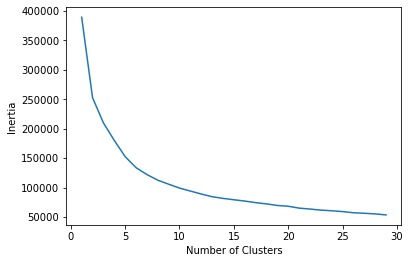

In [79]:
from sklearn.cluster import KMeans

kmeansgrouping=gender
inertias=[]
for i in range (1,30):
    kmeans=KMeans(i)
    kmeans.fit(x_std[kmeansgrouping])
    inertias.append(kmeans.inertia_)
plt.plot(range(1,30),inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

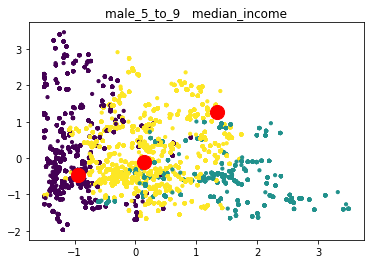

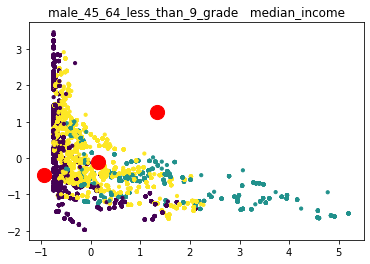

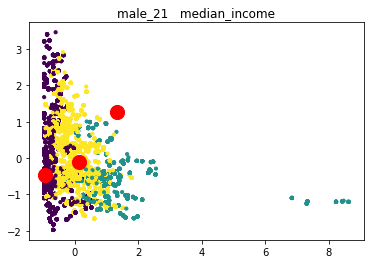

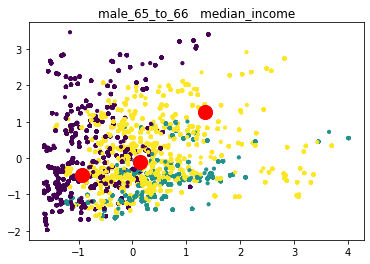

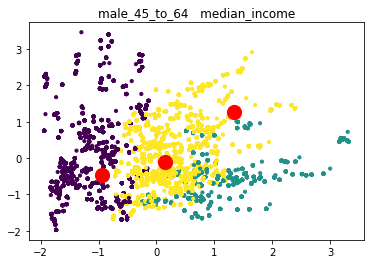

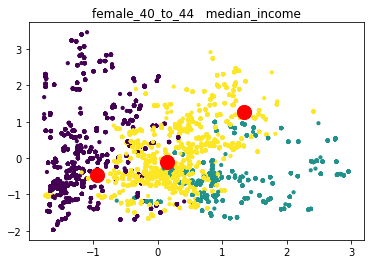

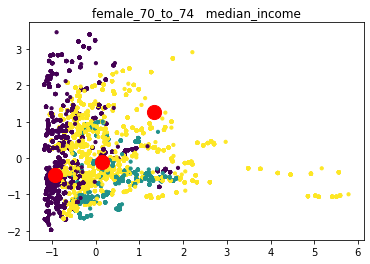

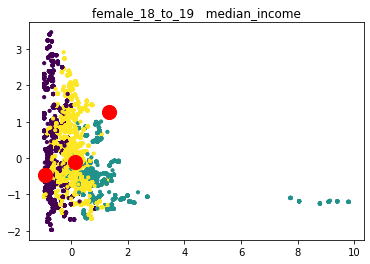

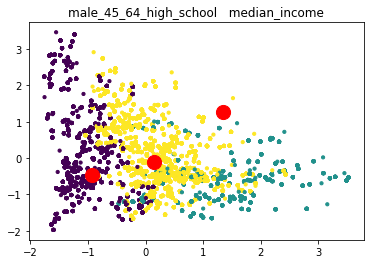

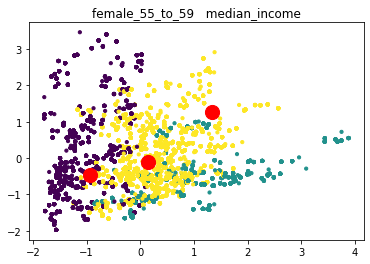

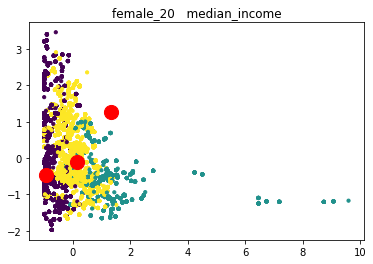

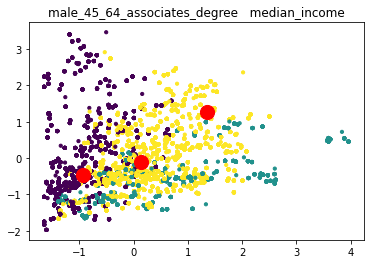

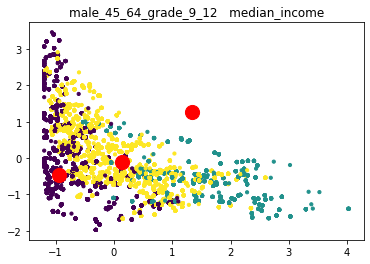

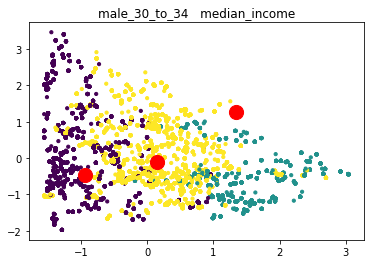

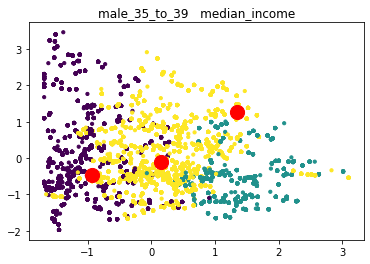

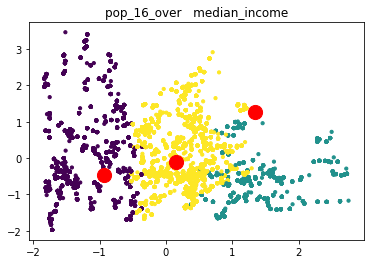

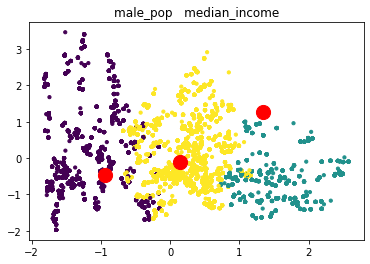

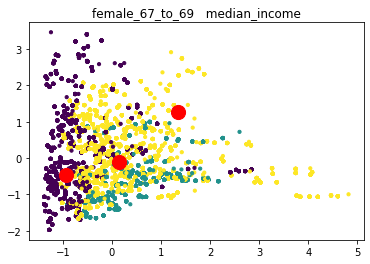

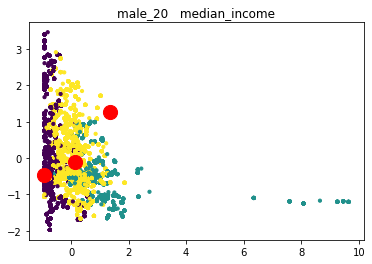

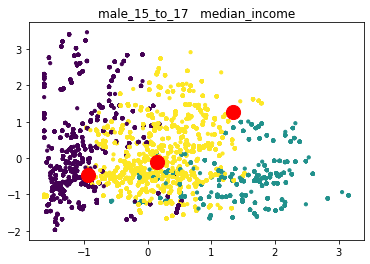

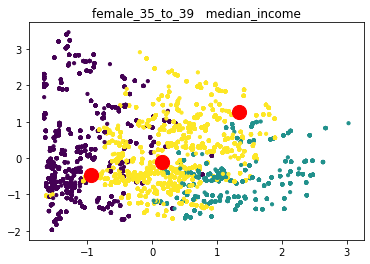

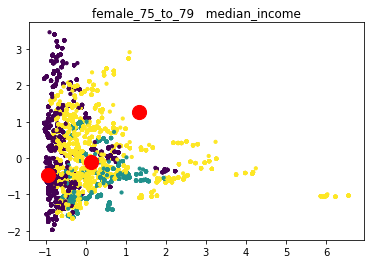

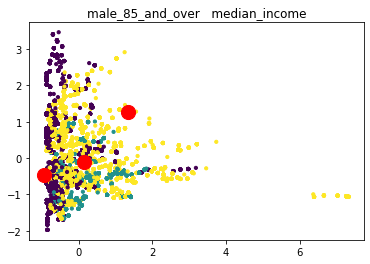

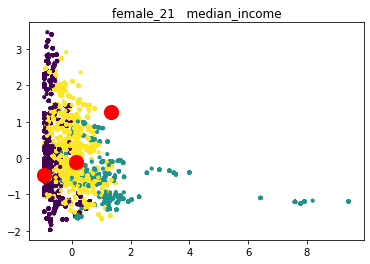

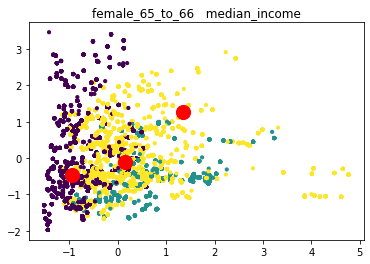

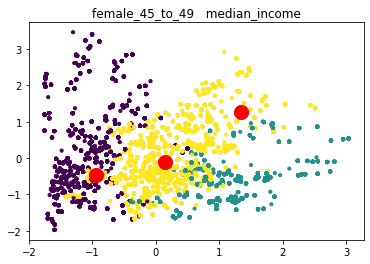

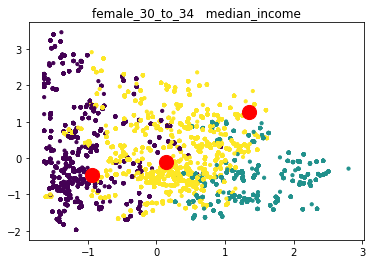

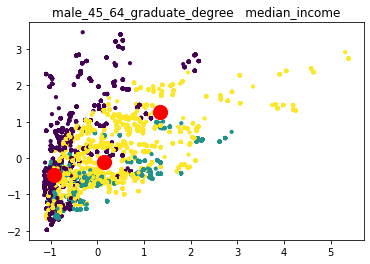

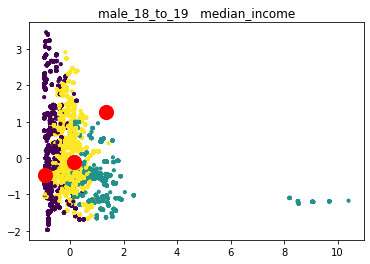

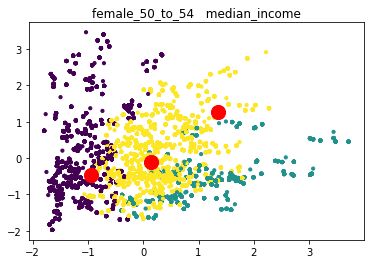

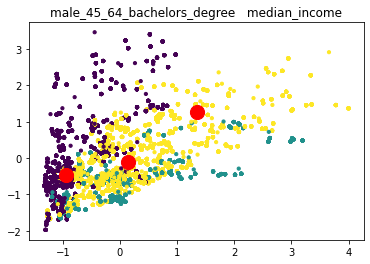

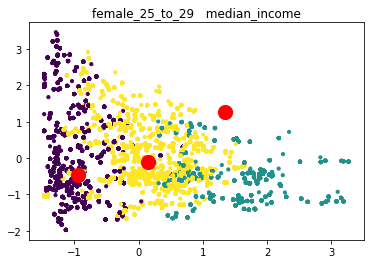

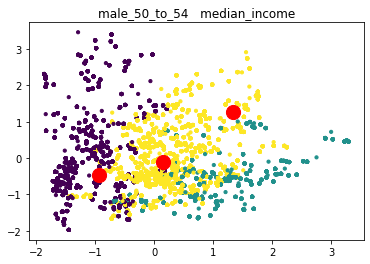

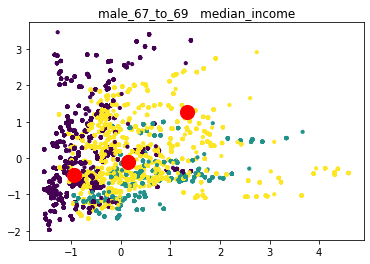

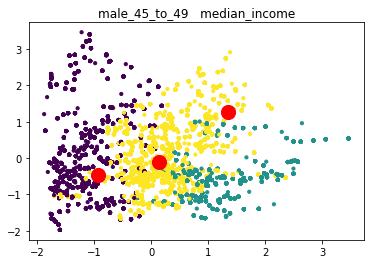

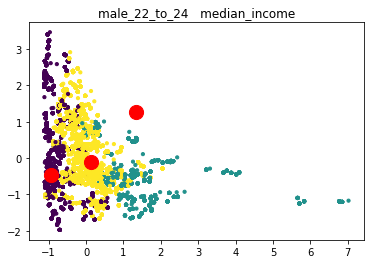

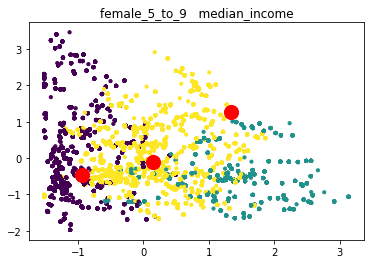

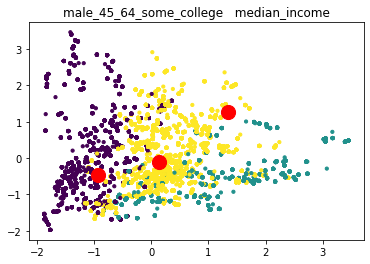

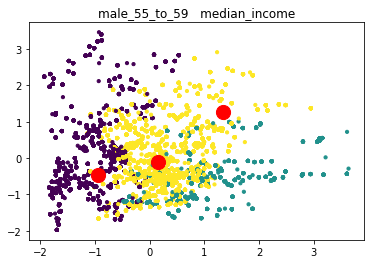

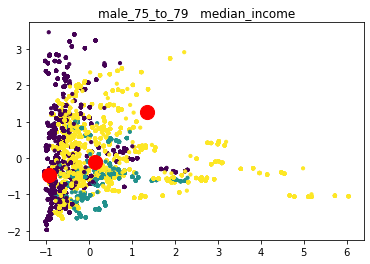

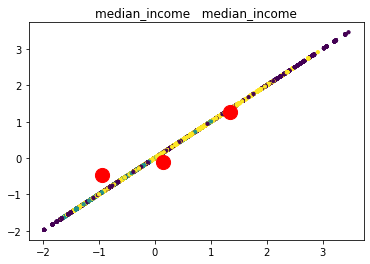

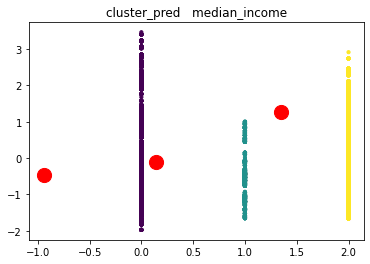

<Figure size 432x288 with 0 Axes>

In [85]:
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeansgrouping])
cluster_new=x_std[kmeansgrouping].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeansgrouping])
cluster_new.shape
for col in cluster_new.columns:
    plt.title(col+"   "+"median_income")
    centers = k_means_new.cluster_centers_
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200);
    plt.draw()
    plt.pause(0.0001)
    plt.clf()

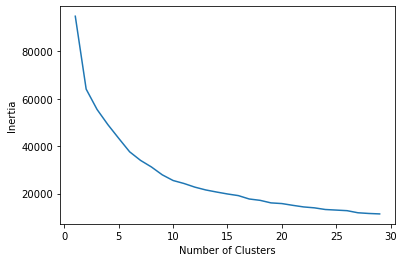

In [75]:
kmeansgrouping=dwellings
inertias=[]
for i in range (1,30):
    kmeans=KMeans(i)
    kmeans.fit(x_std[kmeansgrouping])
    inertias.append(kmeans.inertia_)
plt.plot(range(1,30),inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

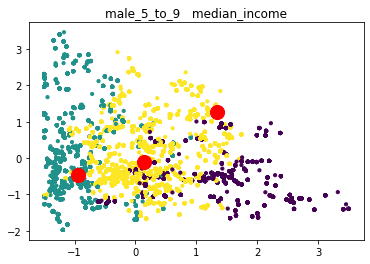

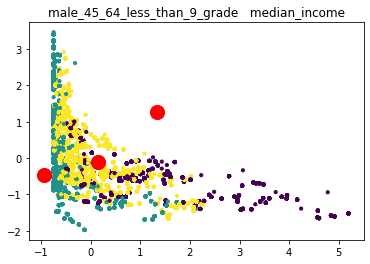

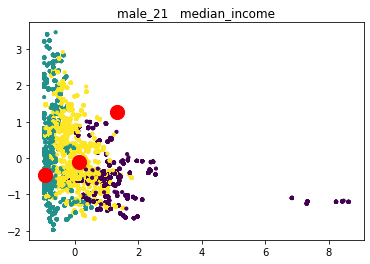

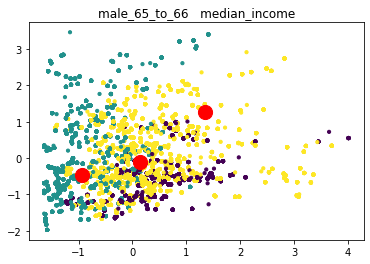

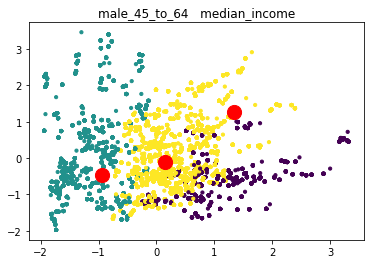

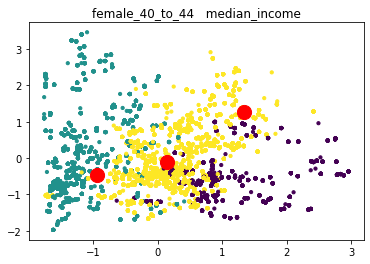

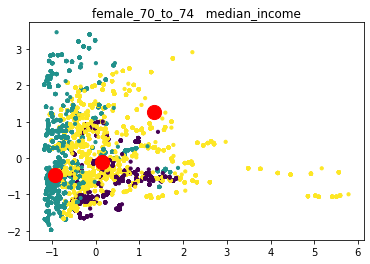

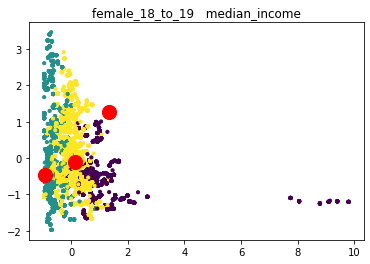

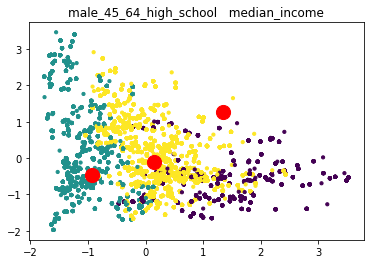

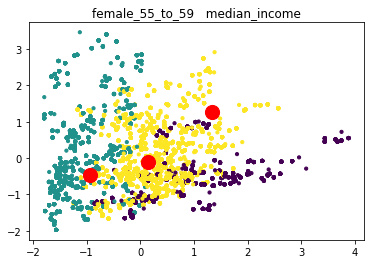

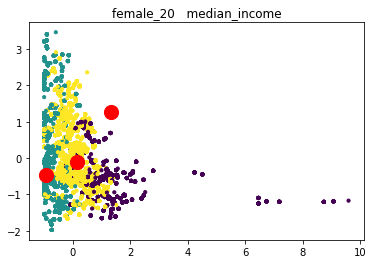

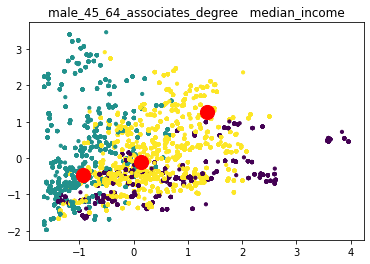

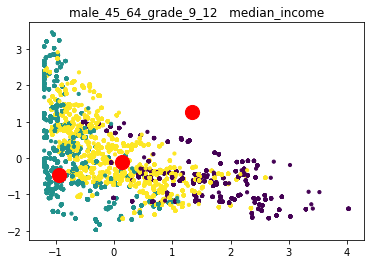

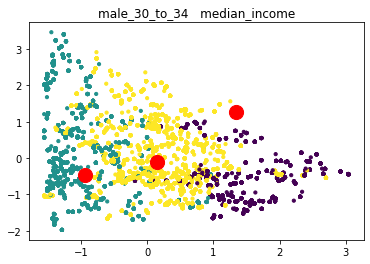

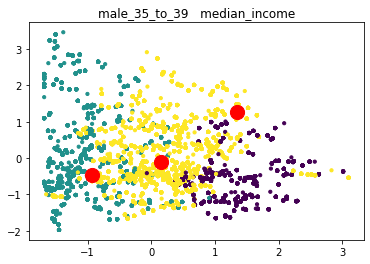

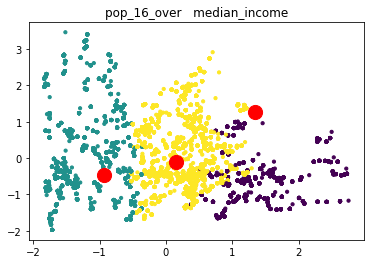

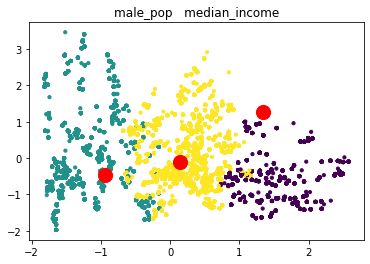

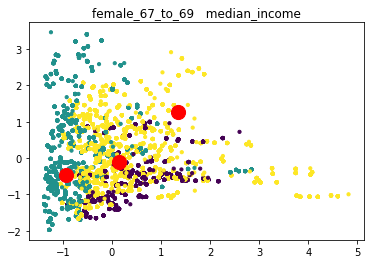

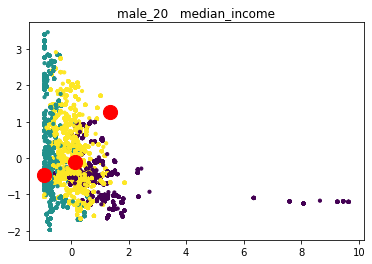

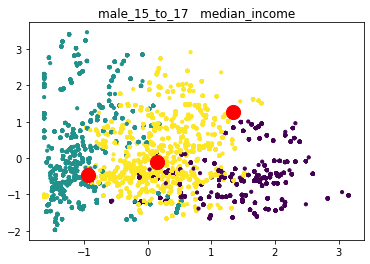

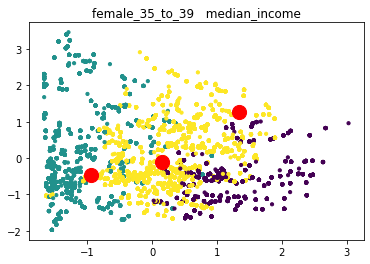

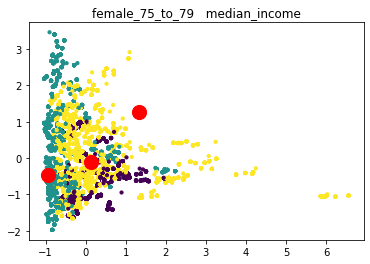

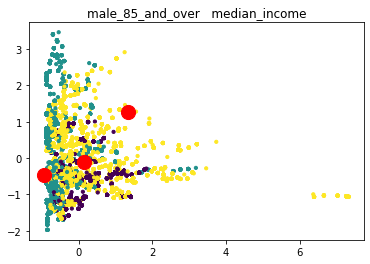

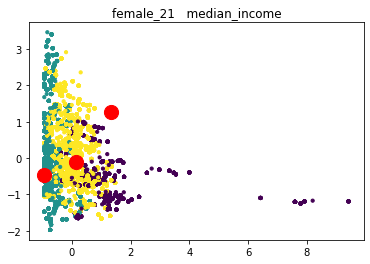

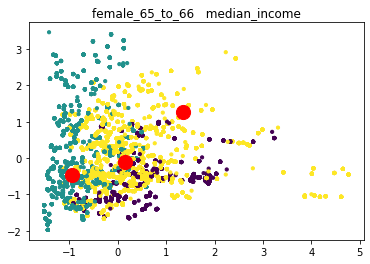

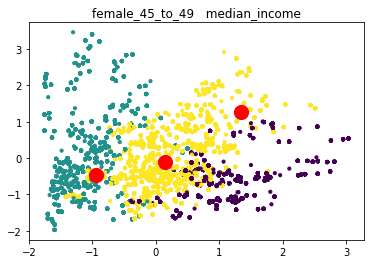

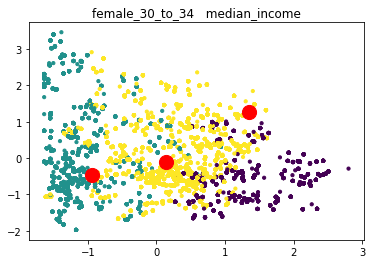

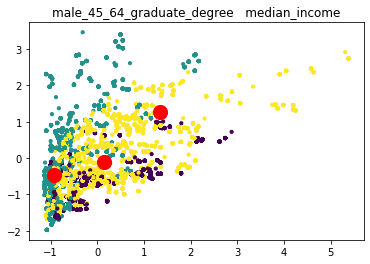

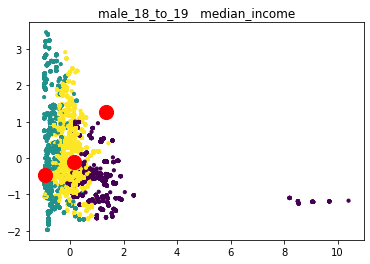

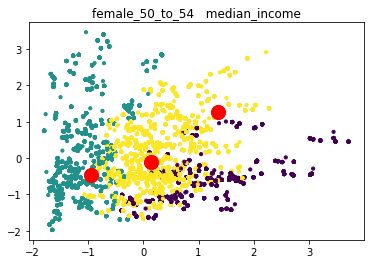

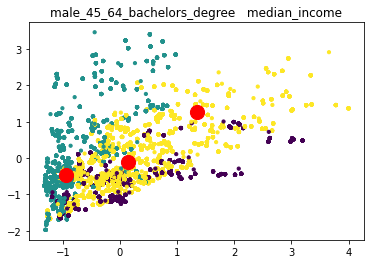

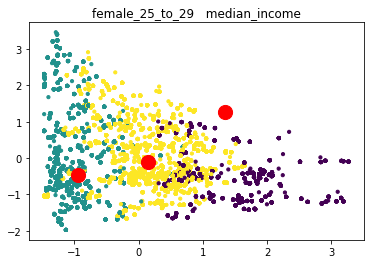

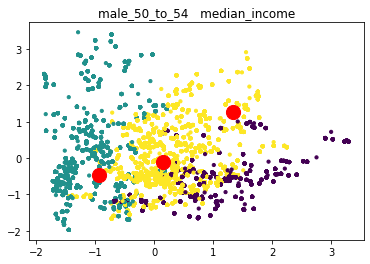

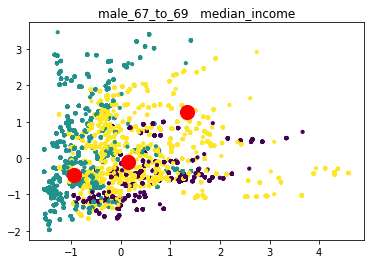

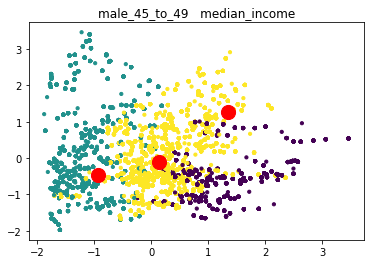

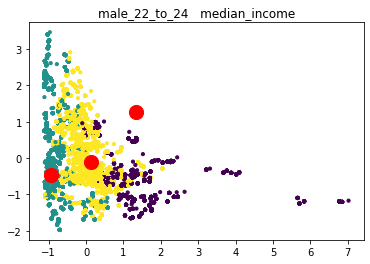

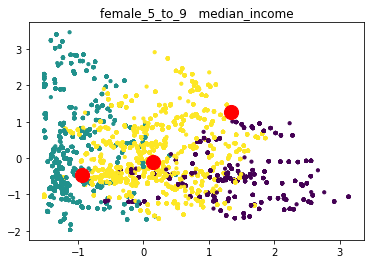

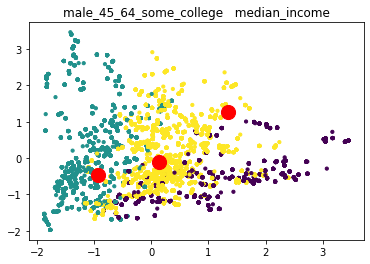

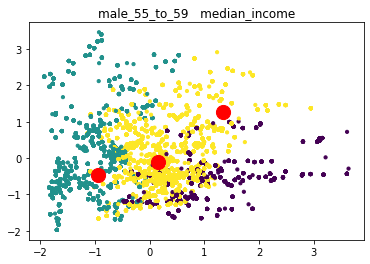

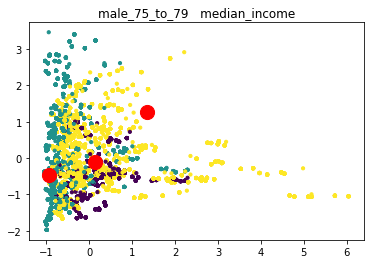

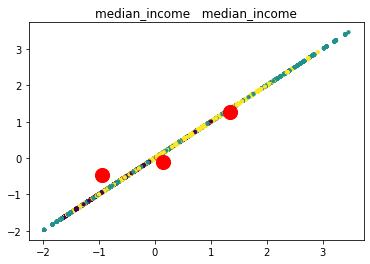

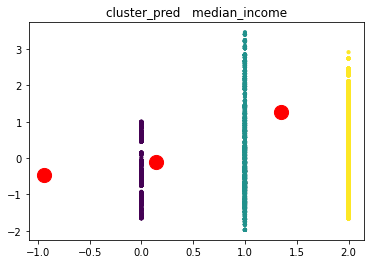

<Figure size 432x288 with 0 Axes>

In [86]:
k_means_new=KMeans(3)
k_means_new.fit(x_std[kmeansgrouping])
cluster_new=x_std[kmeansgrouping].copy()
cluster_new['cluster_pred']=k_means_new.fit_predict(x_std[kmeansgrouping])
cluster_new.shape
for col in cluster_new.columns:
    plt.title(col+"   "+"median_income")
    plt.scatter(cluster_new[col],cluster_new["median_income"], c=cluster_new["cluster_pred"],s=10)
    centers = k_means_new.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200)
    plt.draw()
    plt.pause(0.0001)
    plt.clf()